# Analyzing Hotel Booking Cancellations

## Business Context

As a Data Analyst of a company owning a city hotel in a metropolitan area and a resort hotel located near a coastline both within the United States, you've been assigned by your manager to provide insights on the recent rise of hotel booking cancellations in both hotels for the past few months. These events causes the management to suffer financial losses and they would like to know some leads on reasons why customers cancel their room reservations.

## Dataset

Each row consist a booking made for a particular date and it also contains details containing the following:

| Column Name                    | Description                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| hotel                          | The type of hotel the booking was made                                      |
| lead_time                      | The time (in hours) between the booking date and the expected arrival date  |
| arrival_date_year              | The year of guest's expected arrival                                        |
| arrival_date_month             | The month of guest's expected arrival                                       |
| arrival_date_day_of_month      | The day of the month of guests's expected arrival                           |
| adults                         | Describes how many guests in the booking are adults                         |
| children                       | Describes how many guests in the booking are children                       |
| babies                         | Describes how many guests in the booking are babies                         |
| meal                           | A category that describes what type of meal ordered by the guest |
| country                        | Country of Origin (in ISO 3166 Alpha-3 code format)                         |
| is_repeated_guest              | Describes whether or not the guest have booked before                       |
| previous_cancellations         | Describes the number of previous cancellations by the guest                 |
| previous_bookings_not_canceled | Describes the number of previous non-canceled bookings by the guest         |
| reserved_room_type             | A category that describes what room type the guest reserved                 |
| assigned_room_type             | A category that describes what room type the guest received                 |
| booking_changes                | The number of changes the customer did on the booking                       |
| deposit_type                   | The type of payment deposit used by the guest                               |
| days_in_waiting_list           | Describes the number of days the guest was in the waiting list              |
| customer_type                  | Describes the type of guest in the booking                                  |
| adr                            | The potential "Average Daily Revenue" of the booking                        |
| car_parking_spaces             | The number of car parking spaces requested by the guest                     |
| special_requests               | The number of special requests given by the guest                           |
| status                         | The updated status of the booking                                           |
| status_last_update             | The date of the status registered to the booking system                     |

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Loading


In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
data = pd.read_csv('/content/drive/MyDrive/Refocus/Colab Notebooks/Final Task/hotel_bookings_data.csv')

To check if the loading was successful, we can use the `.head()` method to show the top 5 rows in the data

In [133]:
data.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
0,Resort Hotel,342,2015,July,1,2,0.0,0,BB,PRT,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,737,2015,July,1,2,0.0,0,BB,PRT,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,7,2015,July,1,1,0.0,0,BB,GBR,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,13,2015,July,1,1,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,14,2015,July,1,2,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


We can also check the dataframe details as well using `.info()` method

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

## Data Cleaning

To start off, we can first check if there are any duplicates found in the dataset.


In [135]:
num_rows = data.shape[0]

data.shape[0]

119390

In [136]:
number_of_duplicates = data[data.duplicated()]

number_of_duplicates

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
5,Resort Hotel,14,2015,July,1,2,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,72,2015,July,1,2,0.0,0,BB,PRT,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,70,2015,July,2,2,0.0,0,HB,ROU,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,5,2015,July,5,2,0.0,0,BB,PRT,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,2015,July,7,1,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,186,2017,August,31,2,0.0,0,BB,DEU,...,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,9/3/2017
119352,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [137]:
data = data.drop_duplicates()

In [138]:
data.shape

(87300, 24)

In [139]:

print(data.shape)

(87300, 24)


In [140]:
num_missing_cols = data.isna().sum().sort_values(ascending=False)

In [141]:
print(num_missing_cols)

country                           451
children                            4
hotel                               0
reserved_room_type                  0
status                              0
special_requests                    0
car_parking_spaces                  0
adr                                 0
customer_type                       0
days_in_waiting_list                0
deposit_type                        0
booking_changes                     0
assigned_room_type                  0
previous_bookings_not_canceled      0
lead_time                           0
previous_cancellations              0
is_repeated_guest                   0
meal                                0
babies                              0
adults                              0
arrival_date_day_of_month           0
arrival_date_month                  0
arrival_date_year                   0
status_last_update                  0
dtype: int64


In [142]:
data[data['country'].isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
30,Resort Hotel,118,2015,July,1,1,0.0,0,BB,NaN,...,A,2,No Deposit,0,Transient,62.0,0,2,Check-Out,7/15/2015
4127,Resort Hotel,0,2016,February,15,0,0.0,0,SC,NaN,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2/15/2016
7092,Resort Hotel,8,2016,July,21,1,0.0,0,BB,NaN,...,A,0,No Deposit,0,Transient,73.0,0,2,Canceled,7/20/2016
7860,Resort Hotel,39,2016,August,30,2,0.0,0,HB,NaN,...,A,0,No Deposit,0,Transient,159.0,0,5,Canceled,7/22/2016
8779,Resort Hotel,0,2016,October,13,1,0.0,0,BB,NaN,...,A,0,No Deposit,0,Transient,50.0,0,0,Canceled,10/13/2016


In [143]:
data[data['children'].isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
40600,City Hotel,2,2015,August,3,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/1/2015
40667,City Hotel,1,2015,August,5,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/4/2015
40679,City Hotel,1,2015,August,5,3,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,8/4/2015
41160,City Hotel,8,2015,August,13,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,8/9/2015


In [144]:
data['country'] = data['country'].fillna('Other')

In [145]:
data['children'] = data['children'].fillna(0)

In [146]:
cols_to_use = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month', 'status_last_update']

data[cols_to_use].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,status_last_update
0,2015,July,1,7/1/2015
1,2015,July,1,7/1/2015
2,2015,July,1,7/2/2015
3,2015,July,1,7/2/2015
4,2015,July,1,7/3/2015


In [147]:
data[cols_to_use].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87300 entries, 0 to 119389
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   arrival_date_year          87300 non-null  int64 
 1   arrival_date_month         87300 non-null  object
 2   arrival_date_day_of_month  87300 non-null  int64 
 3   status_last_update         87300 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [148]:
# Convert 'arrival_date_year' to string
data['arrival_date_year'] = data['arrival_date_year'].astype(str)

# Convert 'arrival_date_day_of_month' to string
data['arrival_date_day_of_month'] = data['arrival_date_day_of_month'].astype(str)

In [149]:
col_arrival_dates = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month']
data['arrival_date'] = data[col_arrival_dates].apply(lambda x: '-'.join(x), axis=1)

In [150]:
print(data['arrival_date'])

0            2015-July-1
1            2015-July-1
2            2015-July-1
3            2015-July-1
4            2015-July-1
               ...      
119385    2017-August-30
119386    2017-August-31
119387    2017-August-31
119388    2017-August-31
119389    2017-August-29
Name: arrival_date, Length: 87300, dtype: object


**Next, convert the `arrival_date` and `status_last_update` column into a datetime data type using `pd.to_datetime`**

In [151]:
# Convert 'arrival_date' to datetime
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

# Convert 'status_last_update' to datetime
data['status_last_update'] = pd.to_datetime(data['status_last_update'])


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87300 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87300 non-null  object        
 1   lead_time                       87300 non-null  int64         
 2   arrival_date_year               87300 non-null  object        
 3   arrival_date_month              87300 non-null  object        
 4   arrival_date_day_of_month       87300 non-null  object        
 5   adults                          87300 non-null  int64         
 6   children                        87300 non-null  float64       
 7   babies                          87300 non-null  int64         
 8   meal                            87300 non-null  object        
 9   country                         87300 non-null  object        
 10  is_repeated_guest               87300 non-null  int64         
 11  p

In [153]:
data.drop(col_arrival_dates, axis=1, inplace=True)

### Checking for Outliers


In [154]:
adr_summary = data['adr'].describe()

In [155]:
print(adr_summary)

count    87300.000000
mean       106.366698
std         55.023163
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64


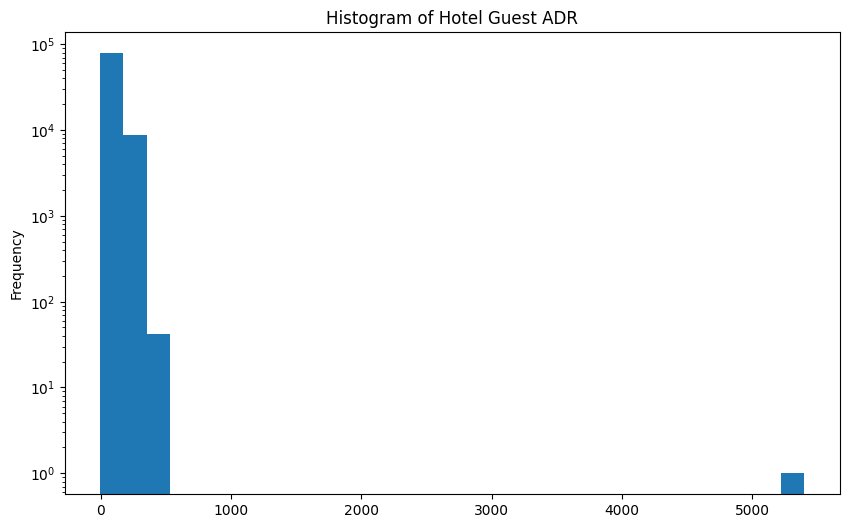

In [156]:
fig, ax = plt.subplots(figsize=(10,6))
ax = data['adr'].plot(kind='hist', bins=30)

ax.set_title('Histogram of Hotel Guest ADR')
ax.set_yscale('log')

In [157]:
data['adr'].sort_values(ascending=False)

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
           ...   
74720        0.00
74721        0.00
1230         0.00
0            0.00
14969       -6.38
Name: adr, Length: 87300, dtype: float64

In [158]:
data = data[(data['adr'] != 5400) & (data['adr'] != -6.38)]

In [159]:
data['adr'].sort_values(ascending=False)

111403    510.0
15083     508.0
103912    451.5
13142     450.0
13391     437.0
          ...  
32633       0.0
97751       0.0
83900       0.0
97752       0.0
0           0.0
Name: adr, Length: 87298, dtype: float64

## Data Analysis and Insights

In [160]:
amount_plotdata = data[data['status'] != 'No-Show']

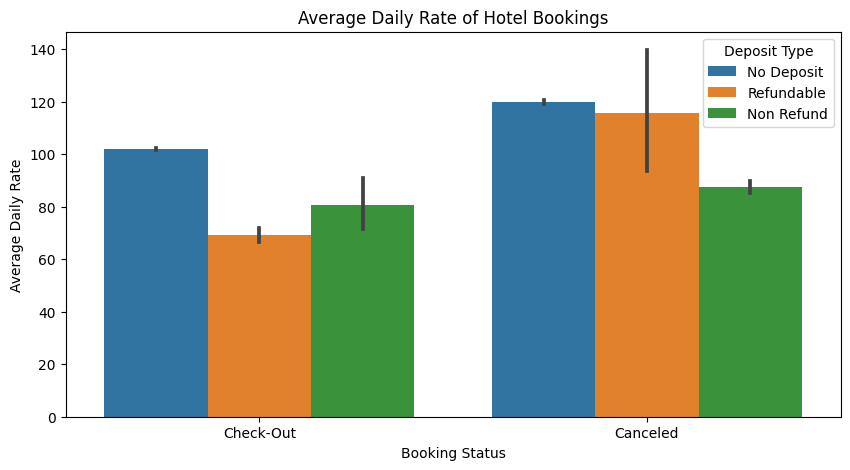

In [161]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= amount_plotdata, x='status', y='adr',hue='deposit_type',ax=ax)
ax.set_title('Average Daily Rate of Hotel Bookings')
ax.set_xlabel('Booking Status')
ax.set_ylabel('Average Daily Rate')
ax.legend(title='Deposit Type')

In [162]:
amount_plotdata.groupby(['status','deposit_type'])['adr'].describe()

count        mean        std   min   25%     50%  \
status    deposit_type                                                       
Canceled  No Deposit    21970.0  119.770062  52.301414   0.0  85.0  112.50   
          Non Refund      973.0   87.634111  33.255428   6.0  62.0   85.00   
          Refundable       25.0  115.838000  60.326292   8.0  76.0  108.36   
Check-Out No Deposit    63183.0  102.088206  51.415440   0.0  68.0   94.80   
          Non Refund       55.0   80.687818  38.075381   6.0  54.5   75.00   
          Refundable       81.0   69.239259  12.794604  34.0  66.0   66.00   

                           75%    max  
status    deposit_type                 
Canceled  No Deposit    147.00  450.0  
          Non Refund    106.00  330.0  
          Refundable    158.33  230.0  
Check-Out No Deposit    129.49  510.0  
          Non Refund    106.00  245.0  
          Refundable     72.00  128.0

In [163]:
data['arrival_day'] = data['arrival_date'].dt.day
data['arrival_month'] = data['arrival_date'].dt.month
data['arrival_year'] = data['arrival_date'].dt.year

In [164]:
data['is_canceled'] = (data['status'] == 'Canceled')

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87298 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87298 non-null  object        
 1   lead_time                       87298 non-null  int64         
 2   adults                          87298 non-null  int64         
 3   children                        87298 non-null  float64       
 4   babies                          87298 non-null  int64         
 5   meal                            87298 non-null  object        
 6   country                         87298 non-null  object        
 7   is_repeated_guest               87298 non-null  int64         
 8   previous_cancellations          87298 non-null  int64         
 9   previous_bookings_not_canceled  87298 non-null  int64         
 10  reserved_room_type              87298 non-null  object        
 11  a

In [166]:
grouping_cols = ['arrival_year','arrival_month','arrival_day']
canceled_data = data.groupby(grouping_cols)['is_canceled'].agg(['sum','count']).reset_index()

In [167]:
canceled_data.head()

,arrival_year,arrival_month,arrival_day,sum,count
0,2015,7,1,11,53
1,2015,7,2,18,54
2,2015,7,3,19,51
3,2015,7,4,18,60
4,2015,7,5,14,51


In [168]:
canceled_data['cancel_rate'] = canceled_data['sum'] / canceled_data['count']

In [169]:
canceled_data.head()

,arrival_year,arrival_month,arrival_day,sum,count,cancel_rate
0,2015,7,1,11,53,0.207547
1,2015,7,2,18,54,0.333333
2,2015,7,3,19,51,0.372549
3,2015,7,4,18,60,0.300000
4,2015,7,5,14,51,0.274510


<ipython-input-170-c84a6f2433a7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= canceled_data, x='arrival_month', y='cancel_rate',


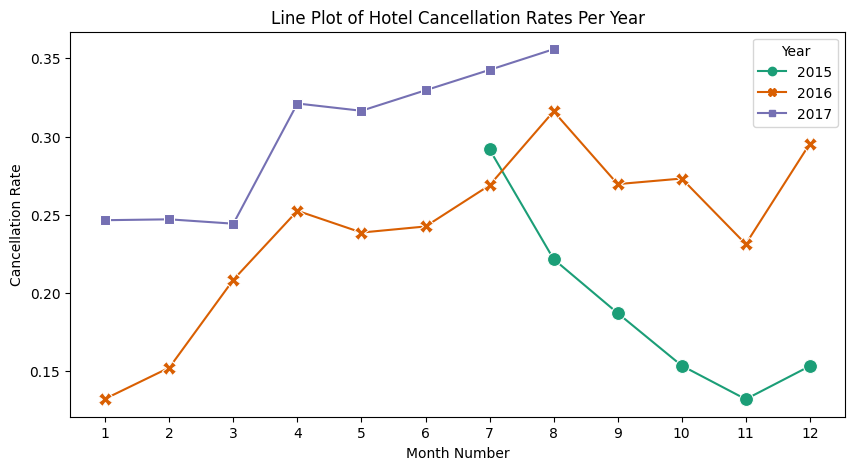

In [170]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data= canceled_data, x='arrival_month', y='cancel_rate',
              hue='arrival_year', style='arrival_year',
              markersize=10, palette='Dark2', ci=None,
              markers=True, dashes=False,
              ax=ax)

ax.set_xticks(range(1,13))

ax.set_title('Line Plot of Hotel Cancellation Rates Per Year')
ax.set_xlabel('Month Number')
ax.set_ylabel('Cancellation Rate')

ax.legend(title='Year')

In [171]:
grouping_cols = ['deposit_type','is_repeated_guest','arrival_date']
pointplot_data = data.groupby(grouping_cols)['is_canceled'].agg(['sum','count']).reset_index()

In [172]:
pointplot_data.head()

,deposit_type,is_repeated_guest,arrival_date,sum,count
0,No Deposit,0,2015-07-01,11,52
1,No Deposit,0,2015-07-02,15,51
2,No Deposit,0,2015-07-03,19,51
3,No Deposit,0,2015-07-04,17,59
4,No Deposit,0,2015-07-05,13,50


In [173]:
pointplot_data ['cancel_rate'] = pointplot_data['sum'] /pointplot_data['count']

In [174]:
pointplot_data ['is_repeated_guest'] = pointplot_data ['is_repeated_guest'].astype('bool')

In [175]:
pointplot_data.head()

,deposit_type,is_repeated_guest,arrival_date,sum,count,cancel_rate
0,No Deposit,False,2015-07-01,11,52,0.211538
1,No Deposit,False,2015-07-02,15,51,0.294118
2,No Deposit,False,2015-07-03,19,51,0.372549
3,No Deposit,False,2015-07-04,17,59,0.288136
4,No Deposit,False,2015-07-05,13,50,0.260000


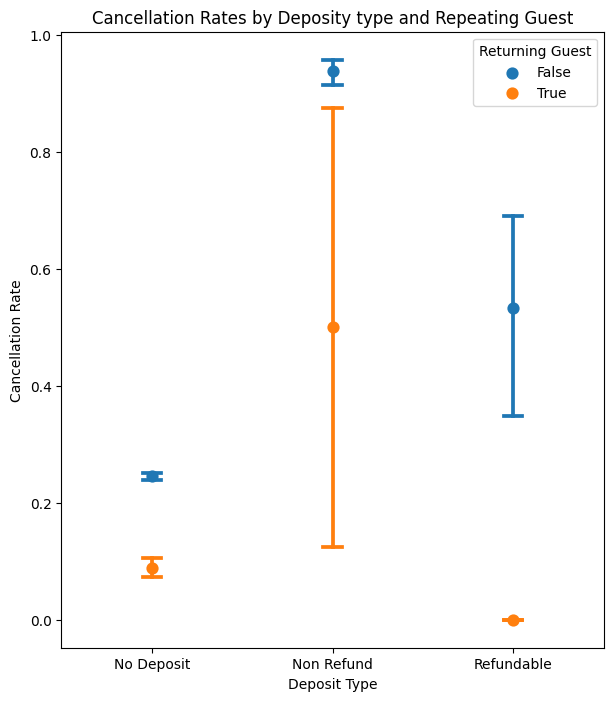

In [176]:
fig, ax = plt.subplots(figsize=(7,8))
sns.pointplot(data=pointplot_data, x='deposit_type', y='cancel_rate',
               hue='is_repeated_guest', join=False,
               capsize=0.1, ax=ax)

ax.set_xlabel('Deposit Type')
ax.set_ylabel('Cancellation Rate')
ax.set_title('Cancellation Rates by Deposity type and Repeating Guest')
ax.legend(title='Returning Guest')

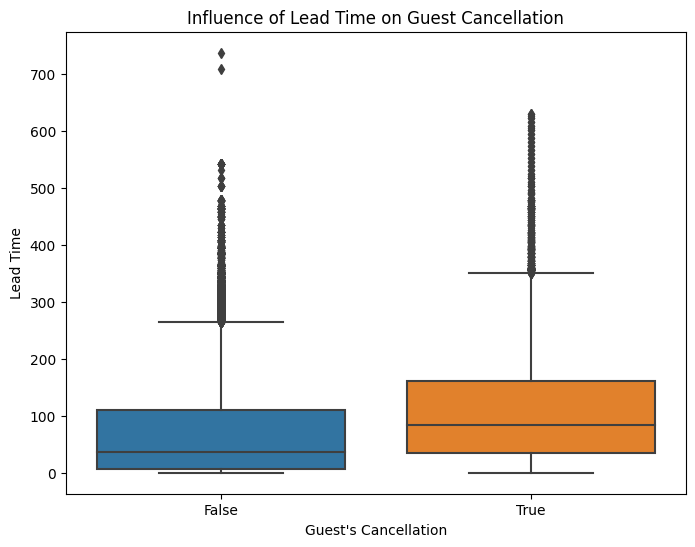

In [177]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='is_canceled', y='lead_time')
plt.title('Influence of Lead Time on Guest Cancellation')
plt.xlabel('Guest\'s Cancellation')
plt.ylabel('Lead Time')
plt.show()

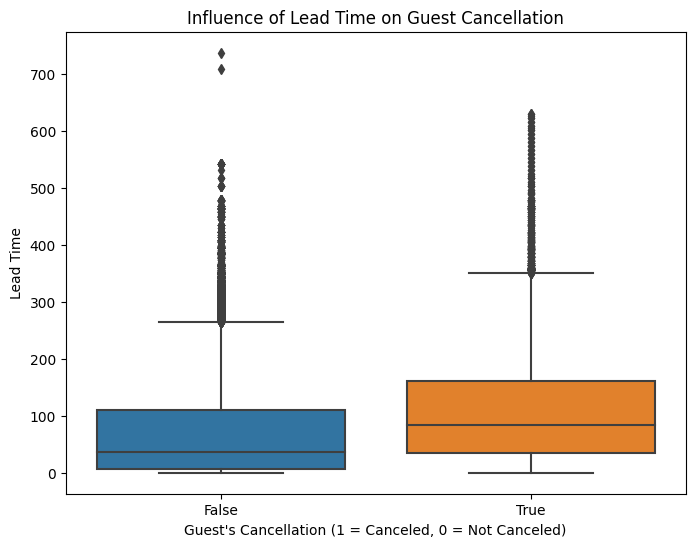

In [178]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='is_canceled', y='lead_time')
plt.title('Influence of Lead Time on Guest Cancellation')
plt.xlabel('Guest\'s Cancellation (1 = Canceled, 0 = Not Canceled)')
plt.ylabel('Lead Time')
plt.show()

## Conclusions and Recommendations

Based on the dataset containing a list of bookings recorded in the booking system, here are some observations on the rise of canceled bookings for the past few months:
The charts shown below were consolidated from the previous output. As seen in the first graph, most of our bookings were canceled, with "No Deposit" and "Refundable" as the leading Deposit Types.
Cancellations tend to increase during the months of June to September, likely due to the Summer Season and changes in travel plans. Conversely, a decrease in cancellation rates can be observed in October and November, possibly due to holidays during those months.
Furthermore, it is noteworthy that non-returning guests have a higher cancellation rate.
Lastly, the data indicates that the higher the lead time, the more likely guests are to cancel their booking reservations.

Based on the data and observations provided, here are some recommendations for the management to minimize profit loss:
1.	Flexible Booking Options: Offer flexible deposit choices so guests feel more secure about their bookings.
2.	Focus on Returning Guests: Use targeted marketing to encourage repeat bookings from satisfied guests.
3.	Promotions for Off-Peak Months: Run promotions during slower months to attract more guests.
4.	Smart Pricing: Adjust room rates based on demand and time to encourage early bookings.
5.	Improved Communication: Keep guests engaged and informed about their reservations with reminder emails.
6.	Fair Cancellation Policies: Review and update cancellation policies to find a balance between flexibility and revenue protection.
7.	Customer Feedback and Satisfaction: Collect guest feedback and track guest satisfaction levels.


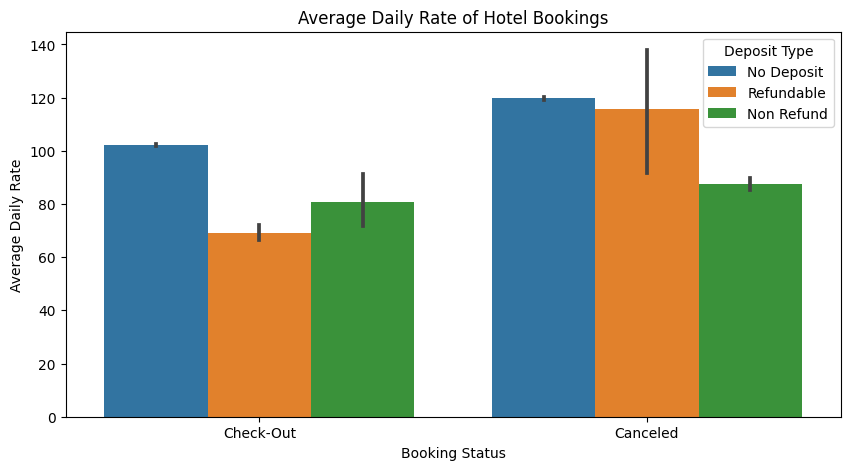

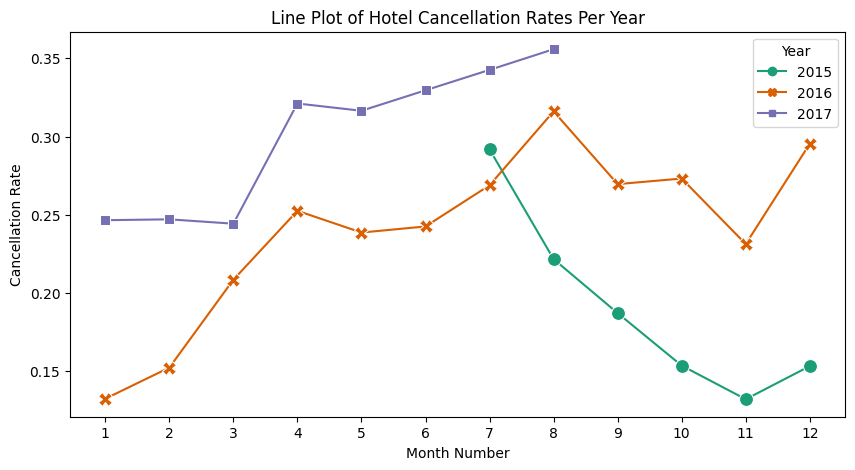

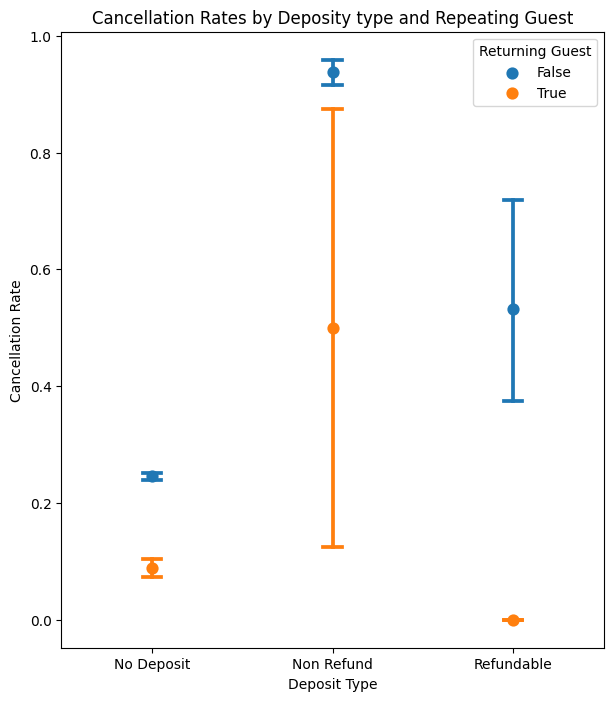

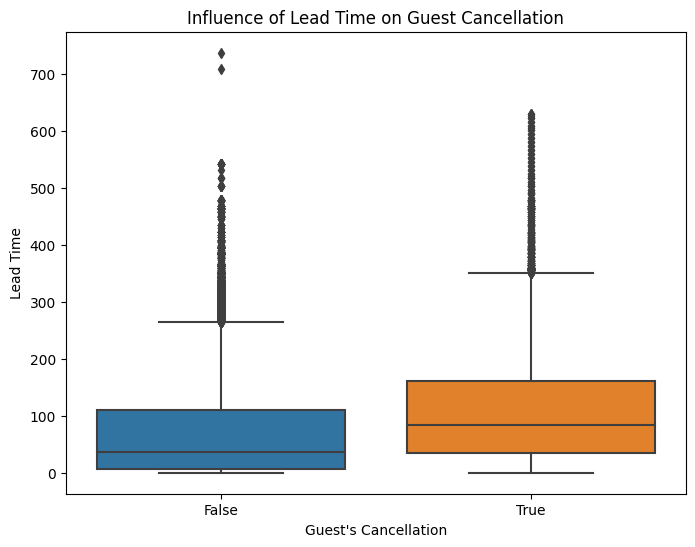

---

**END OF FILE**